<a href="https://colab.research.google.com/github/Beat-ops/devops/blob/master/Copy_of_DmbiIMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("25k IMDb movie Dataset.csv")

# Check the first few rows
df.head()

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,"$71,101,257",5.2,32K,"['Animation', 'Action', 'Adventure']",While spending years attempting to return home...,"['galaxy', 'spaceship', 'robot', 'rocket', 'sp...",Angus MacLane,"['Jason Headley', 'Matthew Aldrich', 'Chris Ev...",Angus MacLane,-2022,/title/tt10298810/
4,Spiderhead,not-released,5.4,23K,"['Action', 'Crime', 'Drama']","In the near future, convicts are offered the c...","['discover', 'medical', 'test', 'reality', 'fi...",Joseph Kosinski,"['Rhett Reese', 'Paul Wernick', 'Chris Hemswor...",George Saunders,-2022,/title/tt9783600/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'25k IMDb movie Dataset.csv')

In [ ]:
numeric_columns = ['Run Time', 'Rating', 'User Rating']

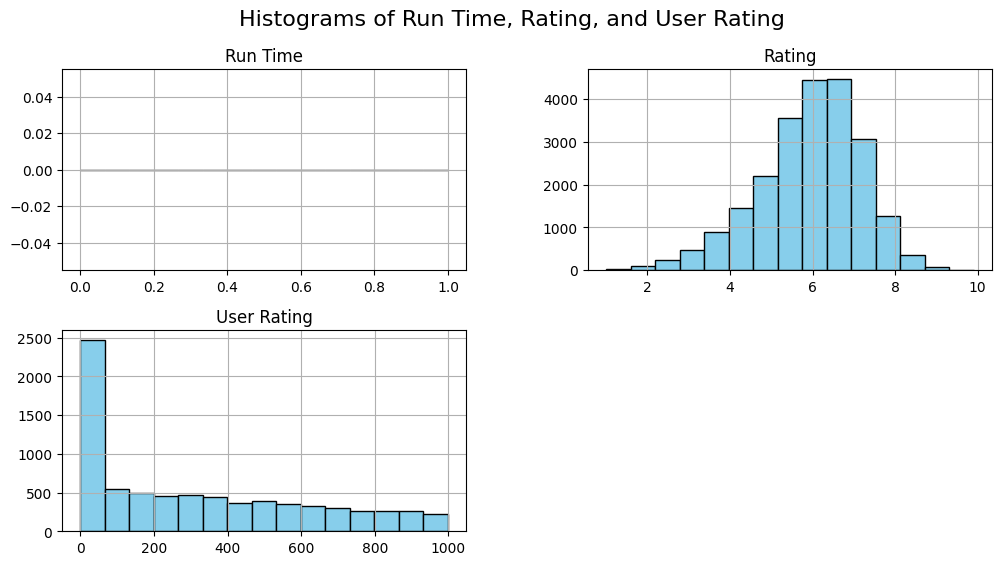

In [ ]:
df[['Run Time', 'Rating', 'User Rating']].hist(bins=15, figsize=(12, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Run Time, Rating, and User Rating', fontsize=16)
plt.show()

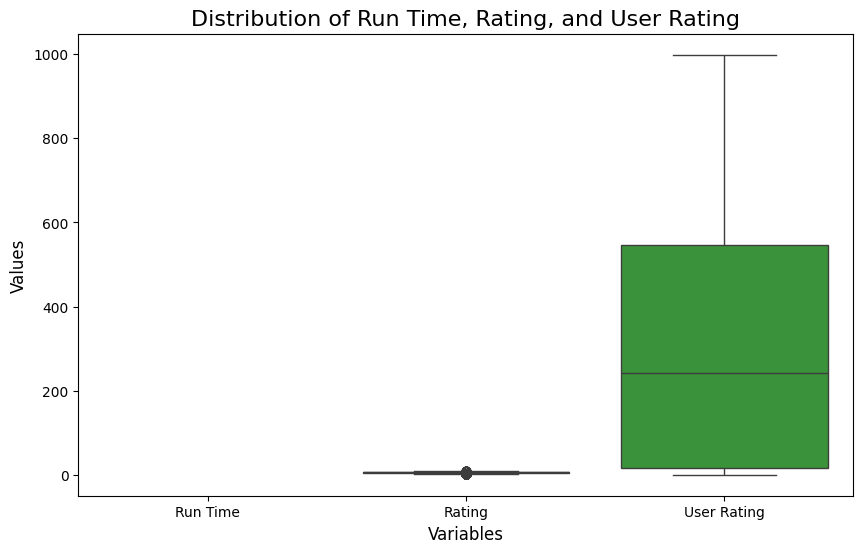

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Run Time', 'Rating', 'User Rating']])
plt.title('Distribution of Run Time, Rating, and User Rating', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select relevant columns
columns_for_clustering = ['Run Time', 'Rating', 'User Rating']
df_kmeans = df[columns_for_clustering].copy()

# Step 2: Convert to numeric (if you haven't done this already)
for col in columns_for_clustering:
    df_kmeans[col] = pd.to_numeric(df_kmeans[col], errors='coerce')

# Step 3: Drop missing values
# Print the shape before and after dropping missing values
print("Shape before dropping missing values:", df_kmeans.shape)
df_kmeans.dropna(inplace=True)
print("Shape after dropping missing values:", df_kmeans.shape)

# Step 4: Standardize the data
# Check if the DataFrame is empty before scaling
if df_kmeans.empty:
    print("DataFrame is empty after dropping missing values. Cannot proceed with scaling.")
else:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_kmeans)

    # Step 5: Apply KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
    df_kmeans['Cluster'] = kmeans.fit_predict(scaled_data)

    # Step 6: Visualize the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Run Time', y='Rating', hue='Cluster', data=df_kmeans, palette='viridis', alpha=0.8)
    plt.title('K-Means Clusters of IMDb Movies', fontsize=16)
    plt.show()

    # Optional: Show cluster centers
    print("Cluster Centers (scaled):")
    print(kmeans.cluster_centers_)

Shape before dropping missing values: (24402, 3)
Shape after dropping missing values: (0, 3)
DataFrame is empty after dropping missing values. Cannot proceed with scaling.


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Bin the numeric columns into categories
df['Run Time Category'] = pd.cut(df['Run Time'], bins=[0, 90, 120, 300],
                                 labels=['Short', 'Medium', 'Long'])
df['Rating Category'] = pd.cut(df['Rating'], bins=[0, 5, 7, 10],
                               labels=['Low', 'Medium', 'High'])
df['User Rating Category'] = pd.cut(df['User Rating'], bins=[0, 5, 7, 10],
                                    labels=['Low', 'Medium', 'High'])

# Step 2: Create a dummy dataframe (one-hot encoding)
transactions = pd.get_dummies(df[['Run Time Category', 'Rating Category', 'User Rating Category']])

# Step 3: Apply Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.1, use_colnames=True)

# Step 4: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("25k IMDb movie Dataset.csv")

# Clean Run Time: Remove 'min' and convert to numeric
df['Run Time'] = df['Run Time'].str.replace('min', '', regex=False).str.strip()
df['Run Time'] = pd.to_numeric(df['Run Time'], errors='coerce')

# Clean Rating: Remove non-numeric characters and convert
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Clean User Rating: Remove non-numeric characters and convert
df['User Rating'] = pd.to_numeric(df['User Rating'], errors='coerce')

# Drop rows with missing numeric data
df_clean_numeric = df[['Run Time', 'Rating', 'User Rating']].dropna()

# Prepare categorical data for Apriori
# Split by comma and strip spaces
def split_and_strip(column):
    return column.fillna('').apply(lambda x: [item.strip() for item in x.split(',') if item.strip() != ''])

df['Generes'] = split_and_strip(df['Generes'])
df['Plot Kyeword'] = split_and_strip(df['Plot Kyeword'])
df['Top 5 Casts'] = split_and_strip(df['Top 5 Casts'])

# Combine all lists into one for Apriori
df['All_Items'] = df['Generes'] + df['Plot Kyeword'] + df['Top 5 Casts']

# View the cleaned data
print(df_clean_numeric.head())
print(df[['All_Items']].head())


Empty DataFrame
Columns: [Run Time, Rating, User Rating]
Index: []
                                           All_Items
0  [['Action', 'Drama'], ['fighter jet', 'sequel'...
1  [['Action', 'Adventure', 'Sci-Fi'], ['dinosaur...
2  [['Action', 'Drama'], ['pilot', 'male camarade...
3  [['Animation', 'Action', 'Adventure'], ['galax...
4  [['Action', 'Crime', 'Drama'], ['discover', 'm...


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("25k IMDb movie Dataset.csv")  # Adjust path if needed

# Clean numeric columns
for col in ['Run Time', 'Rating', 'User Rating']:
    df[col] = df[col].astype(str).str.replace('min', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Properly create 'All_Items' for Apriori
def create_item_list(row):
    items = []
    try:
        if isinstance(row['Generes'], str) and row['Generes'].startswith('['):
            items += eval(row['Generes'])
    except:
        pass
    try:
        if isinstance(row['Top 5 Casts'], str) and row['Top 5 Casts'].startswith('['):
            items += eval(row['Top 5 Casts'])
    except:
        pass
    if isinstance(row['Overview'], str):
        items += row['Overview'].split()  # split overview into words
    return items

df['All_Items'] = df.apply(create_item_list, axis=1)

# Check the result
print(df[['Run Time', 'Rating', 'User Rating', 'All_Items']].head())


   Run Time  Rating  User Rating  \
0       NaN     8.6          NaN   
1       NaN     6.0          NaN   
2       NaN     6.9          NaN   
3       NaN     5.2          NaN   
4       NaN     5.4          NaN   

                                           All_Items  
0  [Action, Drama, Jack Epps Jr., Peter Craig, To...  
1  [Action, Adventure, Sci-Fi, Colin Trevorrow, D...  
2  [Action, Drama, Jack Epps Jr., Ehud Yonay, Tom...  
3  [Animation, Action, Adventure, Jason Headley, ...  
4  [Action, Crime, Drama, Rhett Reese, Paul Werni...  


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("25k IMDb movie Dataset.csv")  # Adjust the path if needed

# Clean numeric columns
for col in ['Run Time', 'Rating', 'User Rating']:
    df[col] = df[col].astype(str).str.replace('min', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Combine relevant string lists into All_Items (Genres, Overview keywords, and Casts)
def safe_eval(val):
    try:
        result = eval(val) if isinstance(val, str) and val.startswith('[') and val.endswith(']') else []
    except:
        result = []
    return result

df['All_Items'] = df[['Generes', 'Overview', 'Top 5 Casts']].apply(
    lambda row: safe_eval(row['Generes']) + safe_eval(row['Overview']) + safe_eval(row['Top 5 Casts']),
    axis=1
)

# Check if it looks good
print(df[['Run Time', 'Rating', 'User Rating', 'All_Items']].head())


   Run Time  Rating  User Rating  \
0       NaN     8.6          NaN   
1       NaN     6.0          NaN   
2       NaN     6.9          NaN   
3       NaN     5.2          NaN   
4       NaN     5.4          NaN   

                                           All_Items  
0  [Action, Drama, Jack Epps Jr., Peter Craig, To...  
1  [Action, Adventure, Sci-Fi, Colin Trevorrow, D...  
2  [Action, Drama, Jack Epps Jr., Ehud Yonay, Tom...  
3  [Animation, Action, Adventure, Jason Headley, ...  
4  [Action, Crime, Drama, Rhett Reese, Paul Werni...  


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Make sure All_Items is a list of lists
transactions = df['All_Items'].dropna().tolist()

# Step 2: Encode transactions into a one-hot DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply Apriori algorithm
frequent_itemsets = apriori(df_apriori, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 5: Show the results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
     support                     itemsets
0   0.321572                     (Action)
1   0.182526                  (Adventure)
2   0.033358                  (Animation)
3   0.041390                  (Biography)
4   0.281534                     (Comedy)
..       ...                          ...
78  0.012991       (Drama, Comedy, Crime)
79  0.025203     (Drama, Comedy, Romance)
80  0.015368      (Mystery, Drama, Crime)
81  0.025244     (Drama, Thriller, Crime)
82  0.010532  (Mystery, Thriller, Horror)

[83 rows x 2 columns]

Association Rules:
           antecedents          consequents   support  confidence      lift
0          (Adventure)             (Action)  0.083559    0.457791  1.423603
1             (Action)          (Adventure)  0.083559    0.259845  1.423603
2             (Action)              (Crime)  0.080690    0.250924  1.012074
3              (Crime)             (Action)  0.080690    0.325455  1.012074
4             (Action)             (Sci-Fi)  0.031145 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load your dataset
df = pd.read_csv("25k IMDb movie Dataset.csv")  # Adjust path if needed

# Clean numeric columns
for col in ['Run Time', 'Rating', 'User Rating']:
    df[col] = df[col].astype(str).str.replace('min', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute or fill missing values instead of dropping them
# For example, fill with the mean:
for col in ['Run Time', 'Rating', 'User Rating']:
    df[col] = df[col].fillna(df[col].mean())

# Define Features and Target
X = df[['Run Time', 'User Rating']]  # Features
y = df['Rating'].apply(lambda x: 'High' if x >= 7 else 'Low')  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred = dtree.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.7896462231935528


In [ ]:
from sklearn.impute import SimpleImputer

# Replace NaNs with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Accuracy
print("Naive Bayes Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7982516049719983


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Run Time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
